# Throughput

## Import Data

In [80]:
import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.5)

In [81]:
data_frames = []

for file in glob.glob("*_1.orun.summary.bench"):
    with open(file) as f:
        data = []
        for l in f:
            temp = json.loads(l)
            if 'name' in temp:
                data.append(temp)
        df = pd.json_normalize(data)
        df['variant'] = file.replace("_1.orun.summary.bench","")
        data_frames.append(df)

df = pd.concat (data_frames, sort=False)
df = df.sort_values(['name']) 
# Uncomment the following to display all the lines in pandas output
#pd.set_option('display.max_rows', df.shape[0]+1)
df

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.minor_words,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,3.992124,3.971837,0.019999,30048,141753.0,https://github.com/kayceesrk/ocaml/archive/ref...,5.1.0+dev1-2022-06-09,gcc,...,2155870564,246,4194620,8227,6,0,3194889,4243468,3302.692158,5.1.0+trunk+decouple_gc
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,3.995900,3.979629,0.015998,30072,143845.0,https://github.com/ocaml/ocaml/archive/trunk.t...,5.1.0+dev1-2022-06-09,gcc,...,2155870563,245,4194619,8229,6,0,3198985,4247564,3302.926541,5.1.0+trunk
21,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.242483,2.031107,0.211134,431864,2795060.0,https://github.com/kayceesrk/ocaml/archive/ref...,5.1.0+dev1-2022-06-09,gcc,...,179655304,56219382,60817709,693,14,0,53105145,53129408,5.398672,5.1.0+trunk+decouple_gc
21,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.248922,2.018891,0.229761,441796,2799356.0,https://github.com/ocaml/ocaml/archive/trunk.t...,5.1.0+dev1-2022-06-09,gcc,...,179630277,56205791,60800377,700,15,0,54398346,54398346,5.813875,5.1.0+trunk
12,alt-ergo.yyll.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,18.043731,17.847042,0.196033,340124,2799356.0,https://github.com/ocaml/ocaml/archive/trunk.t...,5.1.0+dev1-2022-06-09,gcc,...,2053014473,66173516,83438517,7852,21,0,41249798,41249798,30.333665,5.1.0+trunk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,thread_ring_lwt_stream.20_000,taskset --cpu-list 5 ./thread_ring_lwt_stream....,11.028023,11.027624,0.000000,11320,468191.0,https://github.com/kayceesrk/ocaml/archive/ref...,5.1.0+dev1-2022-06-09,gcc,...,1820910764,409668629,409669703,7942,1987,0,594932,619508,101.339346,5.1.0+trunk+decouple_gc
4,yojson_ydump.sample.json,taskset --cpu-list 5 ./ydump.exe -c sample.json,0.767254,0.755037,0.011984,16520,507852.0,https://github.com/ocaml/ocaml/archive/trunk.t...,5.1.0+dev1-2022-06-09,gcc,...,9236546,1047288,7551412,53,19,0,1140896,1211052,106.254668,5.1.0+trunk
4,yojson_ydump.sample.json,taskset --cpu-list 5 ./ydump.exe -c sample.json,0.787442,0.767148,0.020082,20872,505368.0,https://github.com/kayceesrk/ocaml/archive/ref...,5.1.0+dev1-2022-06-09,gcc,...,9236547,1514978,8019102,45,15,0,1618488,1699928,95.668585,5.1.0+trunk+decouple_gc
37,zarith_pi.10_000,taskset --cpu-list 5 ./zarith_pi.exe 10_000,2.380377,2.328000,0.052089,20240,259410.0,https://github.com/kayceesrk/ocaml/archive/ref...,5.1.0+dev1-2022-06-09,gcc,...,4058636,18755,1700070016,3224,3214,0,1146485,1450177,104.513268,5.1.0+trunk+decouple_gc


<hr>

### (USER INPUT)  Baseline variant name

Please choose the baseline variant name for normalized graphs:

In [82]:
baseline = '5.1.0+trunk'

Ensure that the baseline is one of the variants. Returns Raises `ValueError` if the baseline is not present in the loaded data:

In [83]:
is_present = df["variant"].unique().tolist().index(baseline)

<hr>

### Selection example

```
select * from df where variant = baseline and time_secs > 10
```

In [84]:
df.loc[(df['variant'] == baseline) & (df['time_secs'] < 1)]

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.minor_words,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant
3,setrip.-enc_-rseed_1067894368,taskset --cpu-list 5 setrip -enc -rseed 106789...,0.501523,0.497294,0.004010,6348,341321.0,https://github.com/ocaml/ocaml/archive/trunk.t...,5.1.0+dev1-2022-06-09,gcc,...,51104389,1889,10148,199,5,0,61443,61443,4350.428535,5.1.0+trunk
35,soli.200,taskset --cpu-list 5 ./soli.exe 200,0.009413,0.009220,0.000000,5860,61226.0,https://github.com/ocaml/ocaml/archive/trunk.t...,5.1.0+dev1-2022-06-09,gcc,...,510,408,474,2,2,0,40960,40960,12438.775510,5.1.0+trunk
4,yojson_ydump.sample.json,taskset --cpu-list 5 ./ydump.exe -c sample.json,0.767254,0.755037,0.011984,16520,507852.0,https://github.com/ocaml/ocaml/archive/trunk.t...,5.1.0+dev1-2022-06-09,gcc,...,9236546,1047288,7551412,53,19,0,1140896,1211052,106.254668,5.1.0+trunk


In [85]:
df.loc[df['name'] == 'LU_decomposition.1024']

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.minor_words,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.forced_major_collections,gc.heap_words,gc.top_heap_words,gc.mean_space_overhead,variant
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,3.992124,3.971837,0.019999,30048,141753.0,https://github.com/kayceesrk/ocaml/archive/ref...,5.1.0+dev1-2022-06-09,gcc,...,2155870564,246,4194620,8227,6,0,3194889,4243468,3302.692158,5.1.0+trunk+decouple_gc
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,3.995900,3.979629,0.015998,30072,143845.0,https://github.com/ocaml/ocaml/archive/trunk.t...,5.1.0+dev1-2022-06-09,gcc,...,2155870563,245,4194619,8229,6,0,3198985,4247564,3302.926541,5.1.0+trunk


### Projection example

```
select name, variant, time_secs from df
```

In [86]:
df.filter(['name','variant','time_secs'])

,name,variant,time_secs
10,LU_decomposition.1024,5.1.0+trunk+decouple_gc,3.992124
10,LU_decomposition.1024,5.1.0+trunk,3.995900
21,alt-ergo.fill.why,5.1.0+trunk+decouple_gc,2.242483
21,alt-ergo.fill.why,5.1.0+trunk,2.248922
12,alt-ergo.yyll.why,5.1.0+trunk,18.043731
...,...,...,...
19,thread_ring_lwt_stream.20_000,5.1.0+trunk+decouple_gc,11.028023
4,yojson_ydump.sample.json,5.1.0+trunk,0.767254
4,yojson_ydump.sample.json,5.1.0+trunk+decouple_gc,0.787442
37,zarith_pi.10_000,5.1.0+trunk+decouple_gc,2.380377


## Time

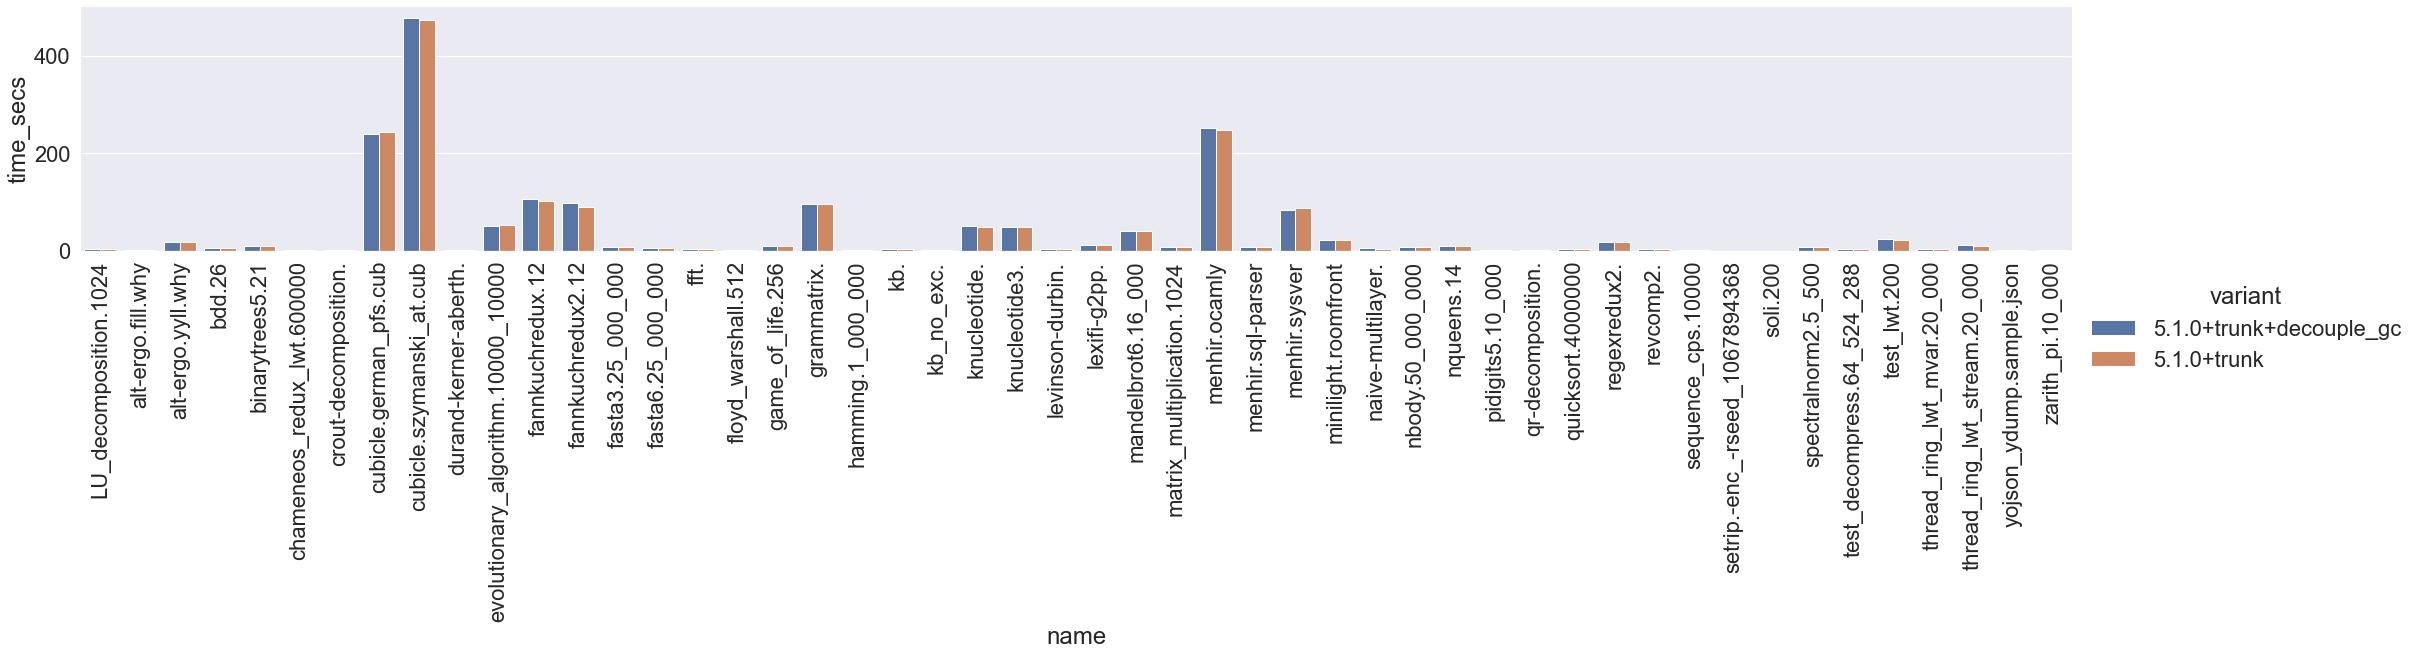

In [87]:
g = sns.catplot (x='name', y='time_secs', hue='variant', data = df, kind ='bar', aspect=6)
g.set_xticklabels(rotation=90)

### Normalised

In [88]:
# returns a dictionary with {key = name : value : metric}
# the metric corresponds to the variant
def create_column(df, variant, metric):
    df = pd.DataFrame.copy(df)
    variant_metric_name = list([ zip(df[metric], df[x], df['name']) 
              for x in df.columns.array if x == "variant" ][0])
    name_metric = {n:t for (t, v, n) in variant_metric_name if v == variant}
#     print(name_metric)
    return name_metric

def add_display_name(df,variant, metric):
    name_metric = create_column(pd.DataFrame.copy(df), variant, metric)
#    print(name_metric)
    disp_name = [name+" ("+str(round(name_metric[name], 2))+")" for name in df["name"]]
    df["display_name"] = pd.Series(disp_name, index=df.index)
    return df

def normalise(df, baseline, topic, additionalTopics=[]):
    """Normalise the different variant values against the baseline.
    
    The resultant dataframe contains the normalised topic values for all 
    the variants other than the baseline. additionalTopics can be used to 
    include columns other than the topic column in the returned dataframe.
    """
    df = add_display_name(df, baseline, topic)
    items= ['name', topic, 'variant', 'display_name'] + additionalTopics
    df_filtered = df.filter(items=items)
    df_pivot = df_filtered.pivot(index='name', columns='variant', values=[topic])
    baseline_column = (topic, baseline)
    select_columns = [c for c in df_pivot.columns if c != baseline_column]
    normalised = df_pivot.div(df_pivot[baseline_column], axis=0)[select_columns]
    normalised = normalised.melt(col_level=1, ignore_index=False, value_name = 'n' + topic).reset_index()
    if not select_columns:
        print("need another variant to plot normalized graph")
    return pd.merge(normalised, df_filtered, on=['name', 'variant'])

def plot_normalised(df,variant,topic):
    df = pd.DataFrame.copy(df)
    df.sort_values(by=[topic],inplace=True)
    df[topic] = df[topic] - 1
    g = sns.catplot (x="display_name", y=topic, hue='variant', data = df, kind ='bar', aspect=8, bottom=1)
    g.set_xticklabels(rotation=90)
    g.ax.legend(loc=8)
    g._legend.remove()
    g.ax.set_xlabel("Benchmarks")
    return g
    # g.ax.set_yscale('log')

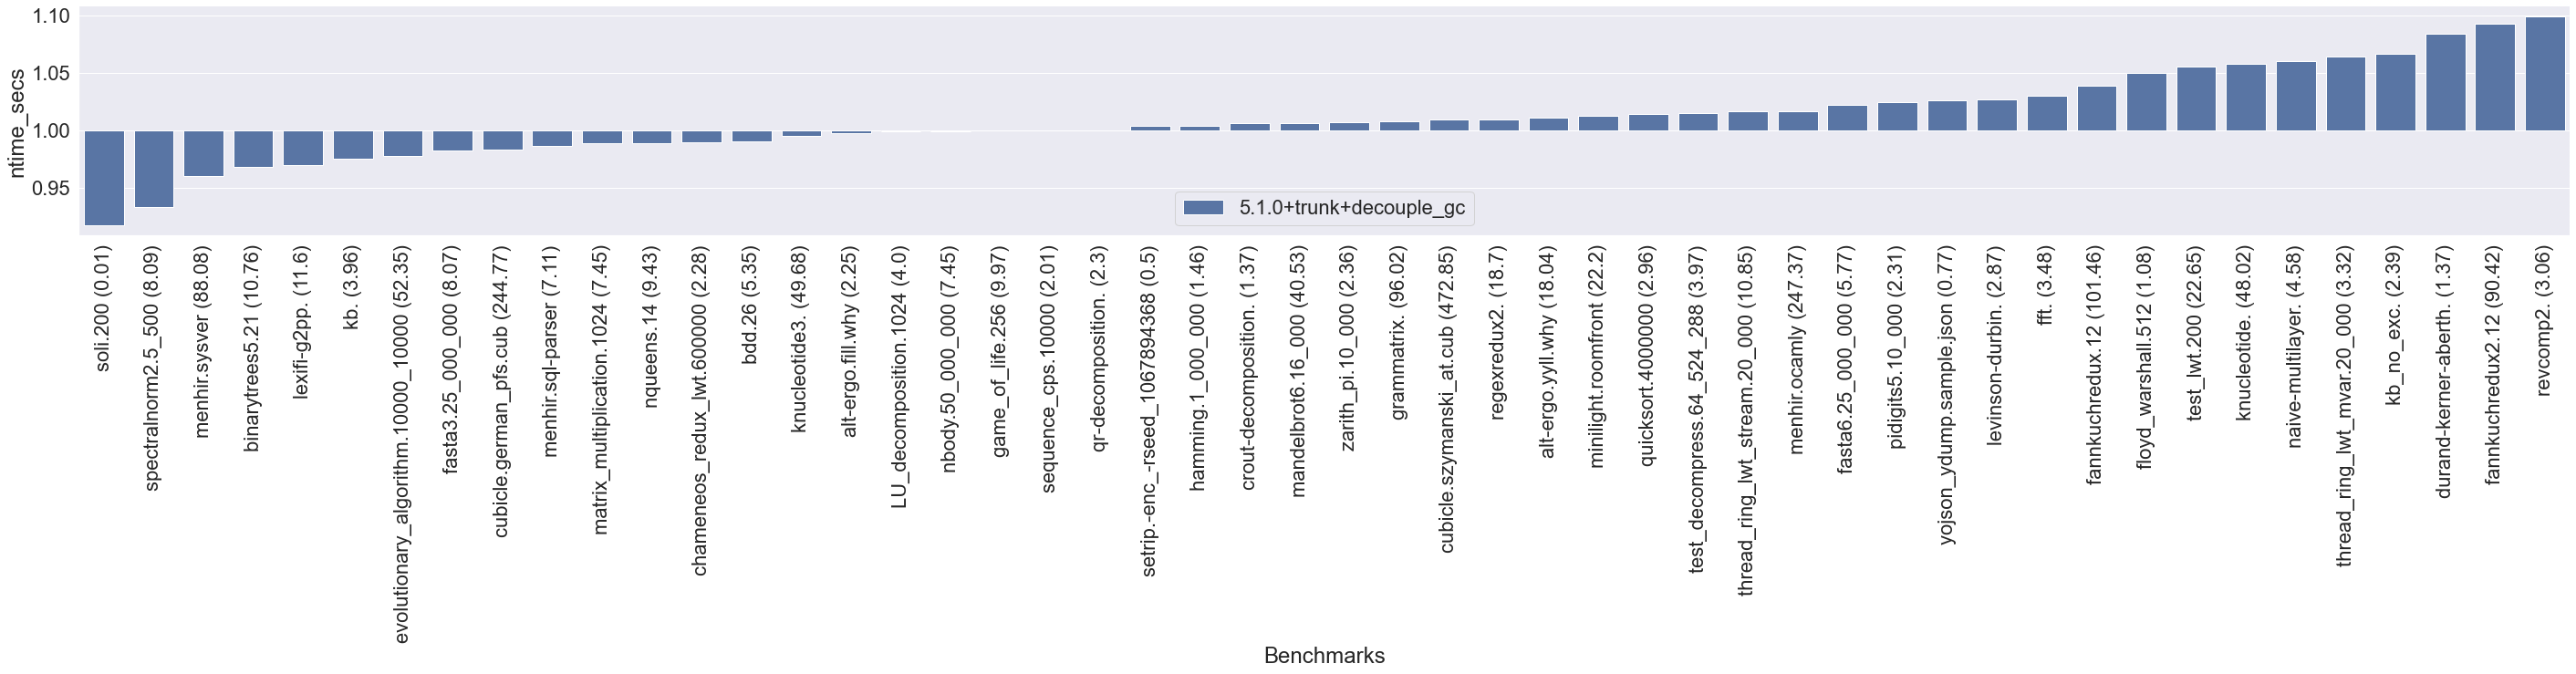

In [91]:
ndf = normalise(df,baseline,'time_secs')
plot_normalised(ndf,baseline,'ntime_secs')

## Top heap words

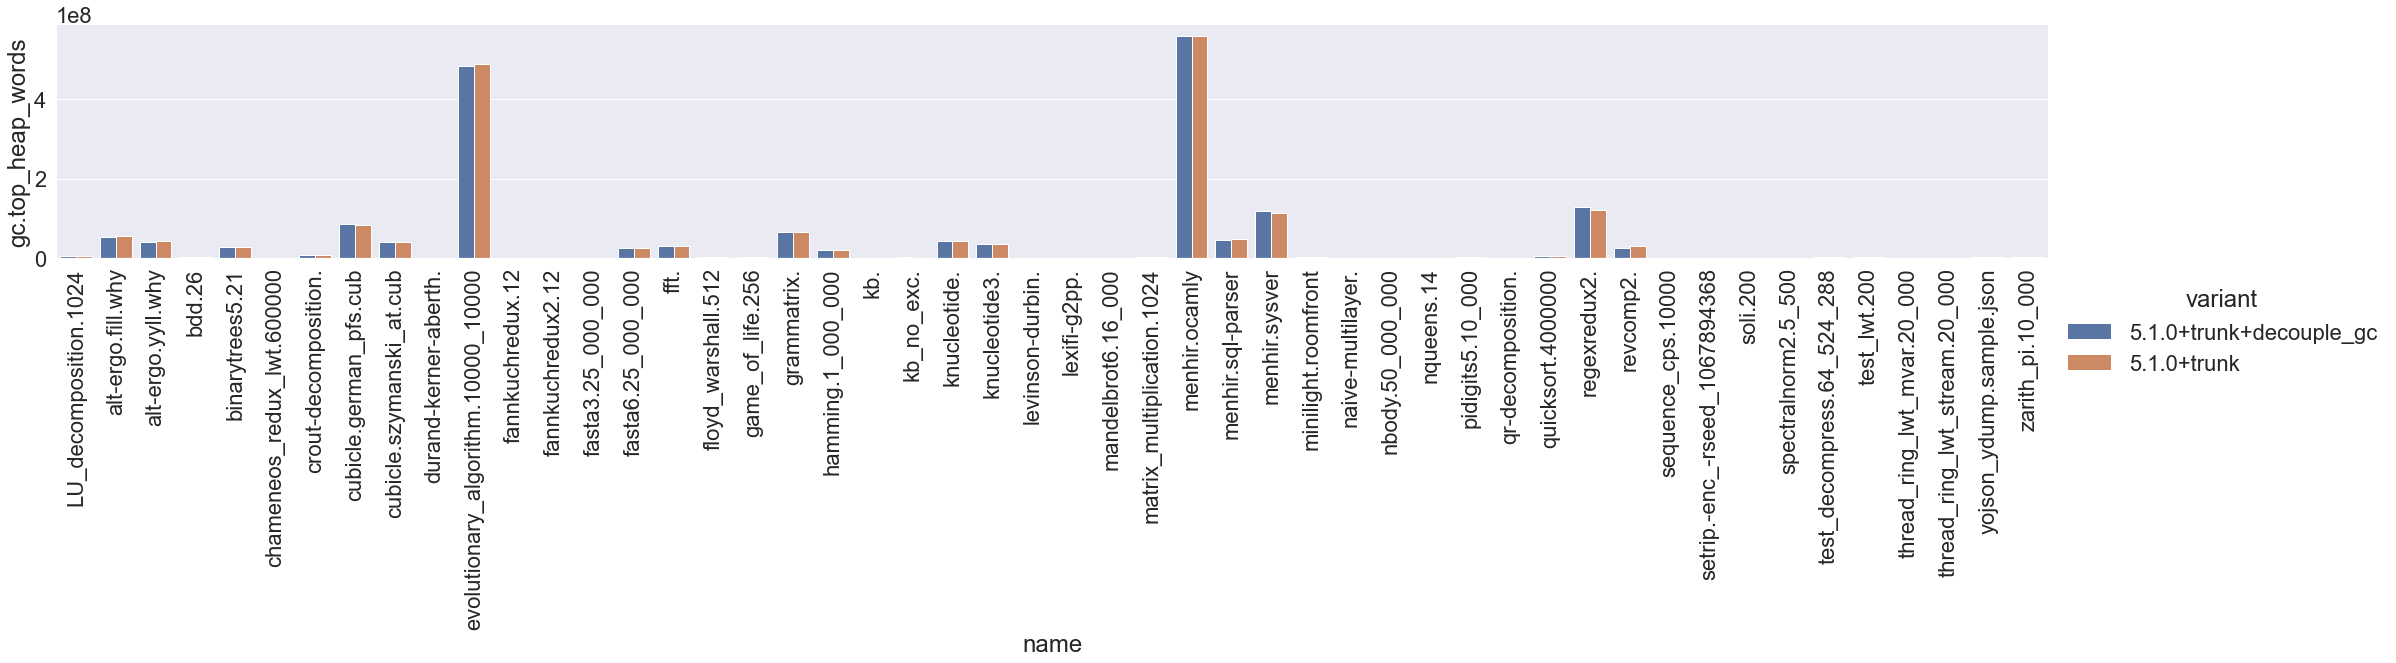

In [92]:
g = sns.catplot (x='name', y='gc.top_heap_words', hue='variant', data = df, kind ='bar', aspect=6)
g.set_xticklabels(rotation=90)

### Normalised

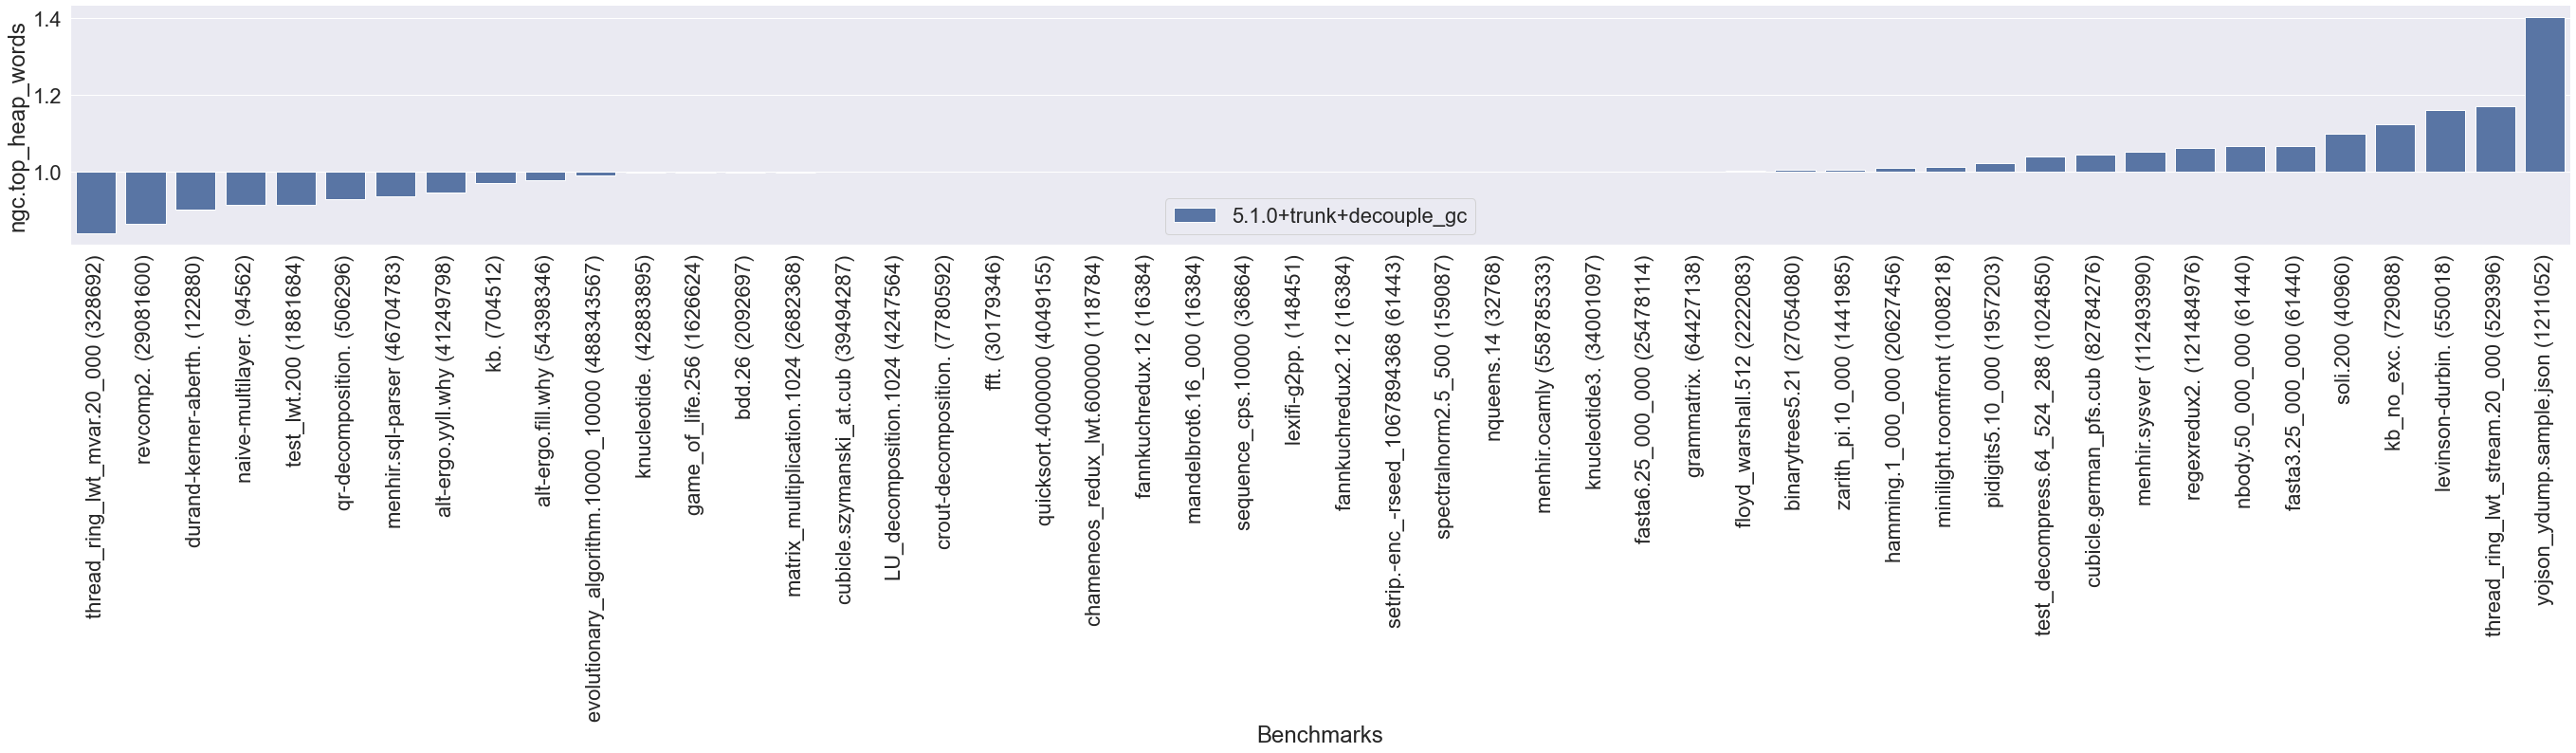

In [93]:
ndf = normalise(df,baseline,'gc.top_heap_words')
plot_normalised(ndf,baseline,'ngc.top_heap_words')

## Max RSS (KB)

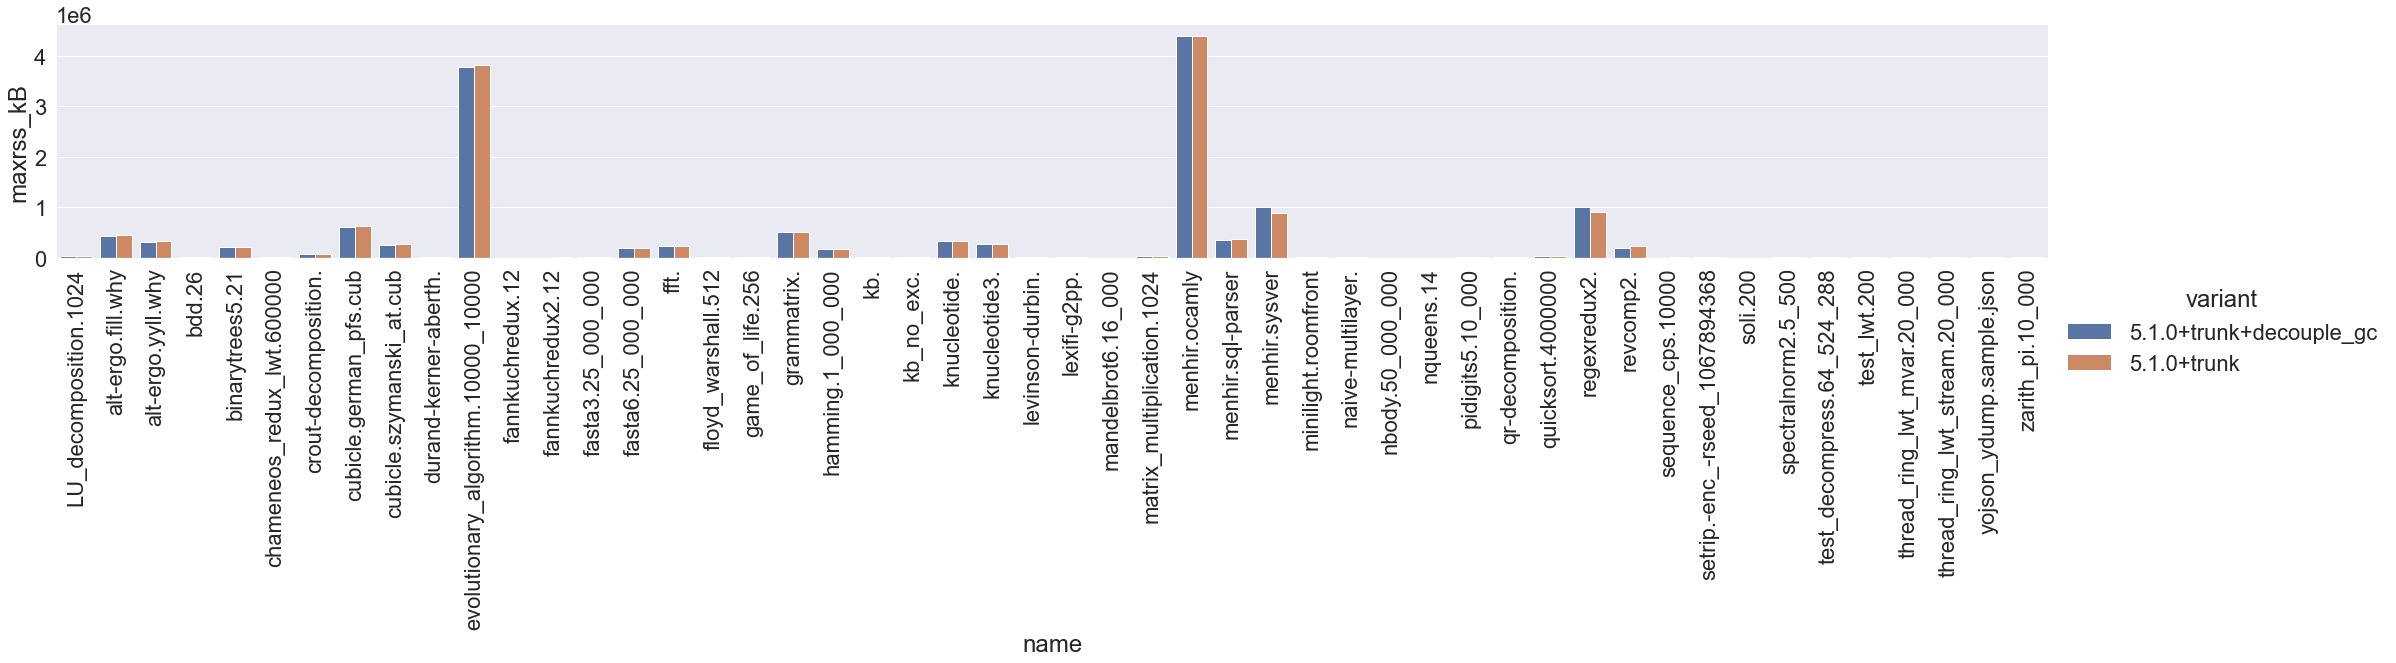

In [94]:
g = sns.catplot (x='name', y='maxrss_kB', hue='variant', data = df, kind ='bar', aspect=6)
g.set_xticklabels(rotation=90)

### Normalised

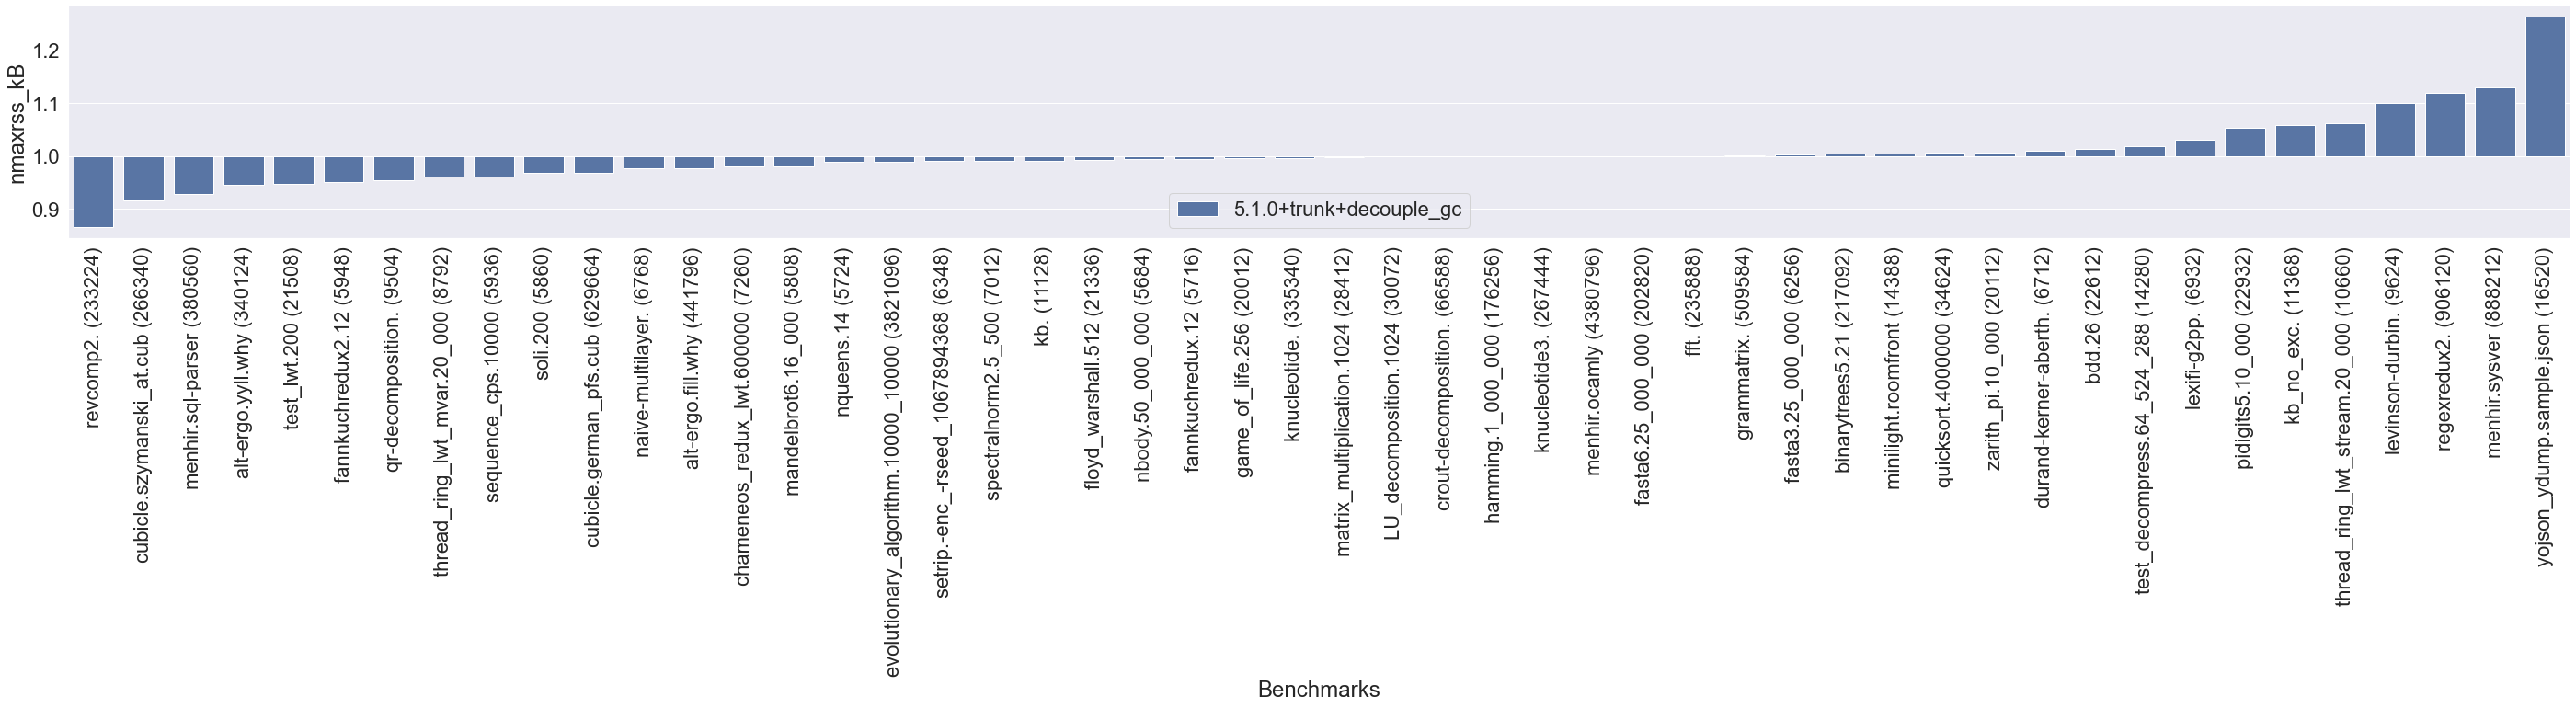

In [95]:
ndf = normalise(df,baseline,'maxrss_kB')
plot_normalised(ndf,baseline,'nmaxrss_kB')

## Major Collections

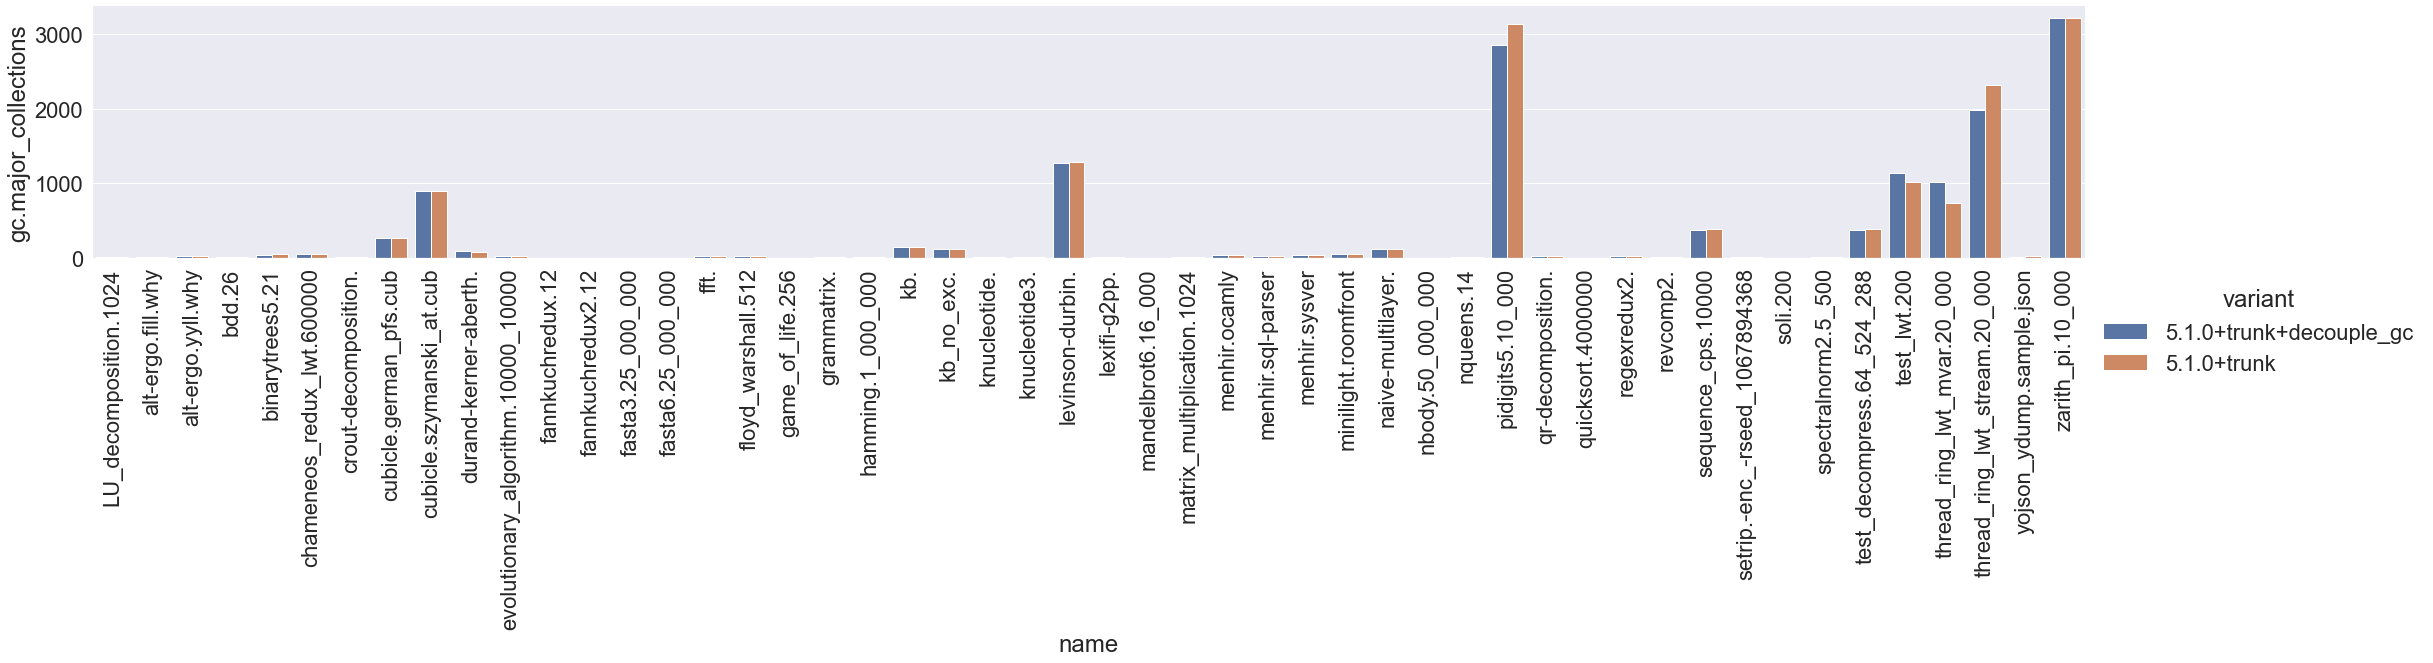

In [96]:
g = sns.catplot (x='name', y='gc.major_collections', hue='variant', data = df, kind ='bar', aspect=6)
g.set_xticklabels(rotation=90)

### Normalised

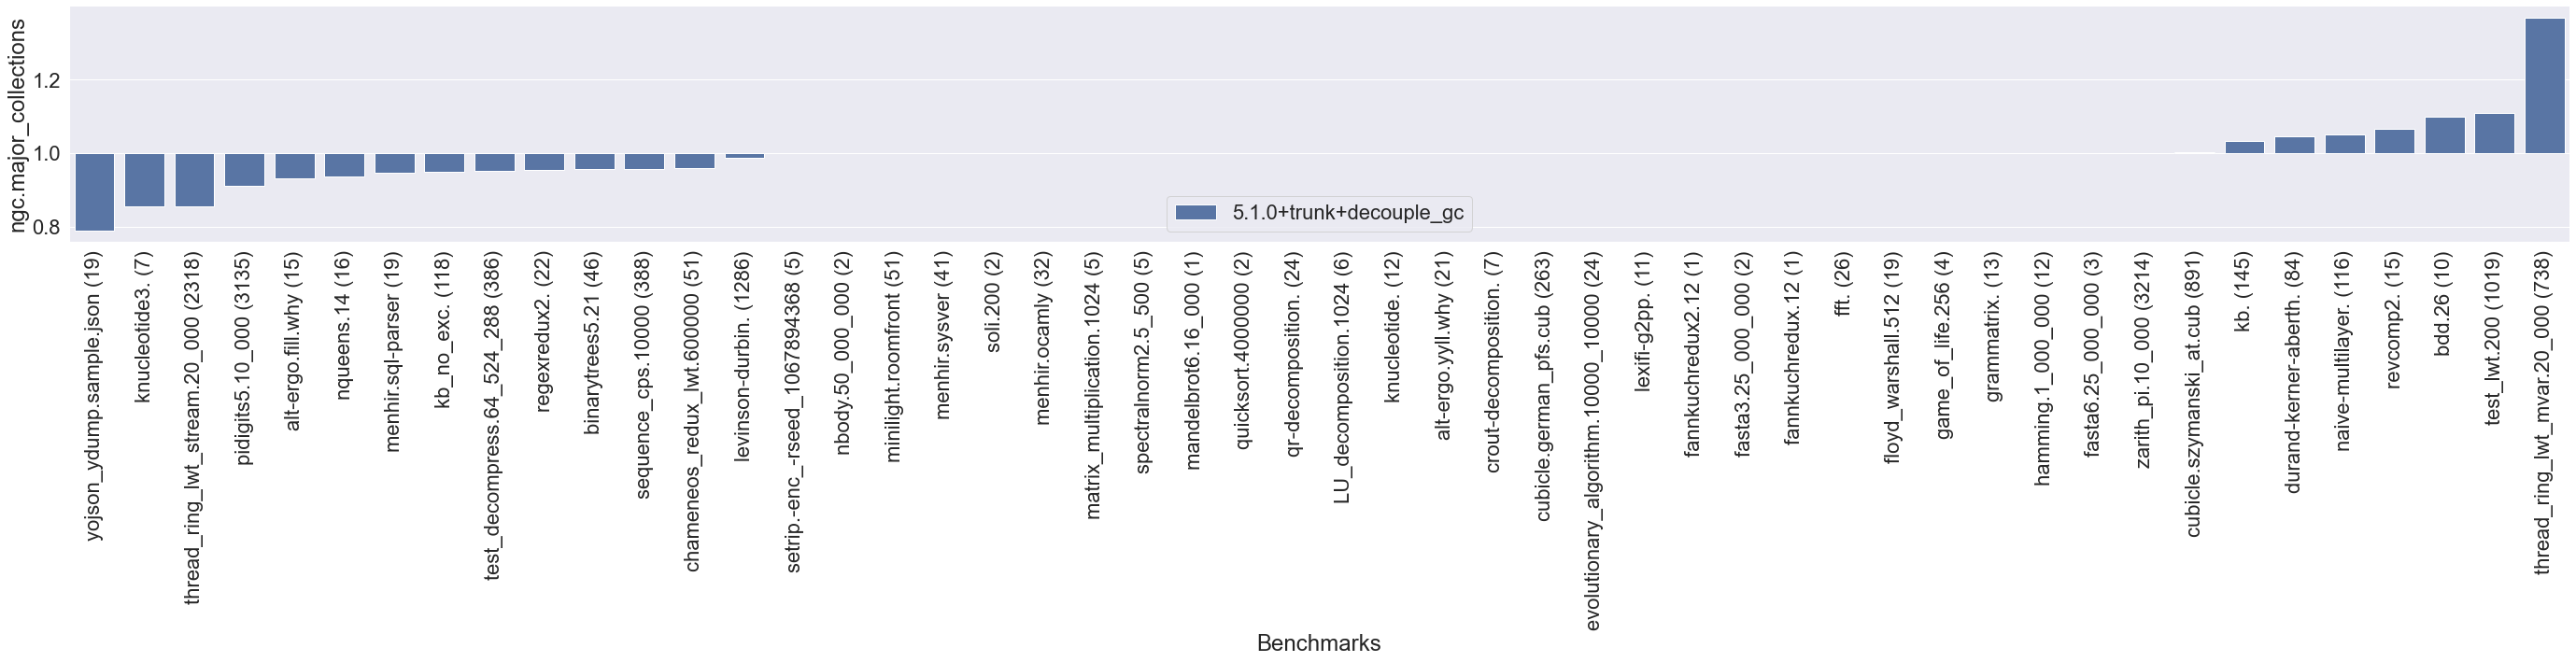

In [97]:
ndf = normalise(df,baseline,'gc.major_collections')
plot_normalised(ndf,baseline,'ngc.major_collections')

## Major words

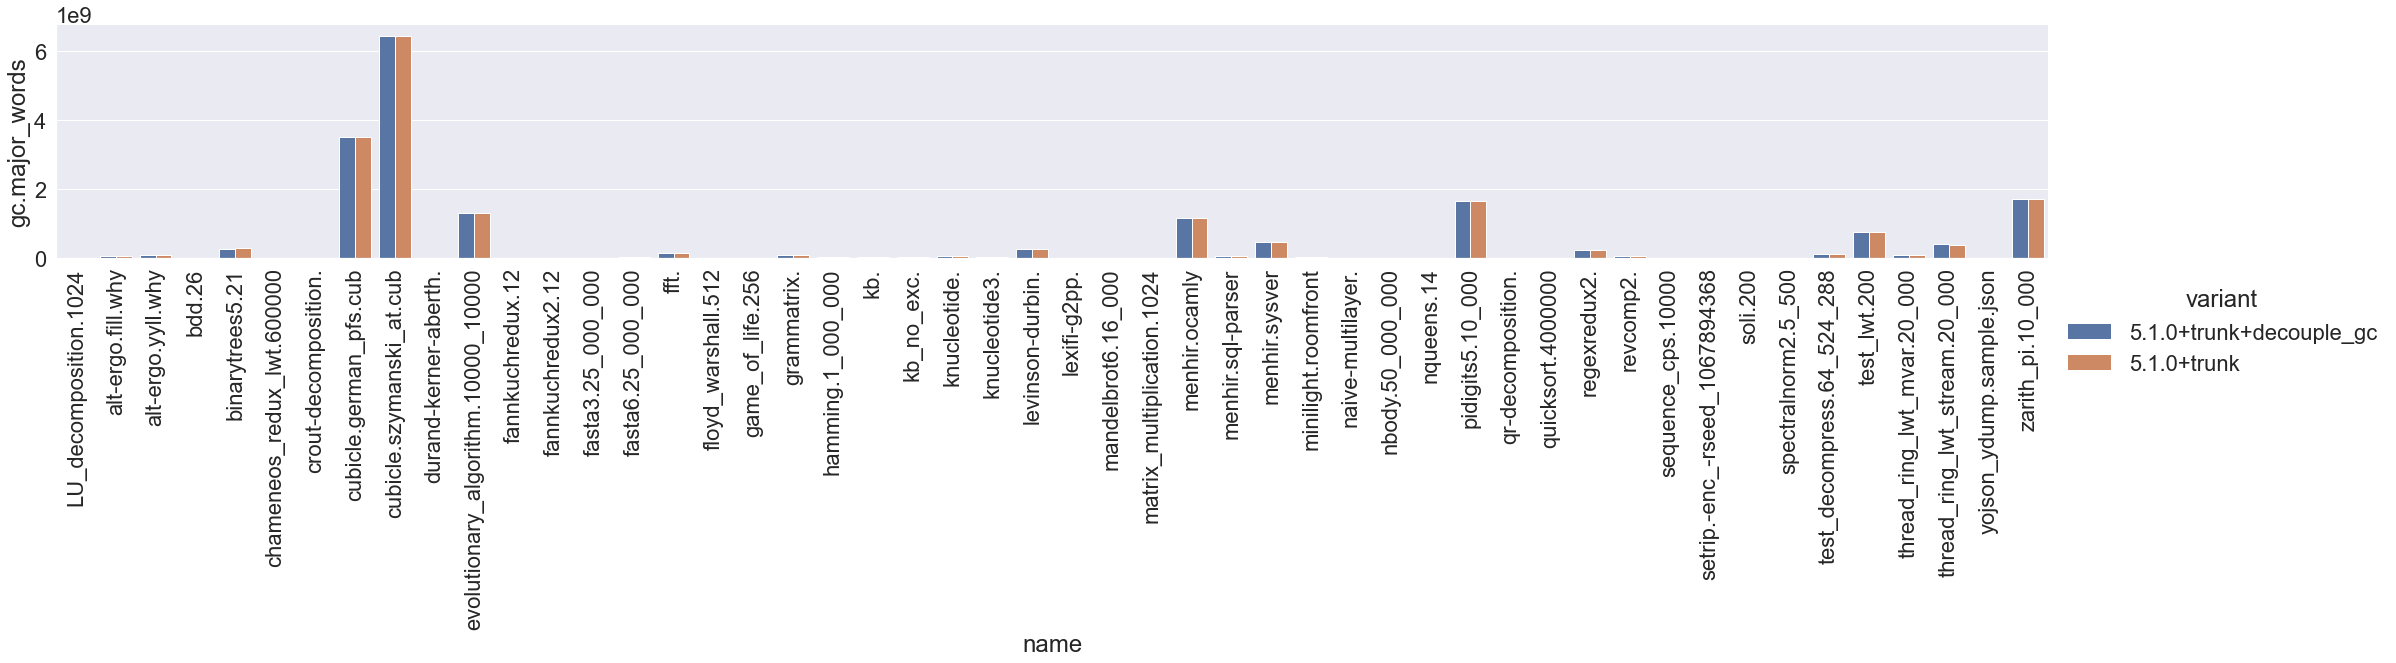

In [98]:
g = sns.catplot (x='name', y='gc.major_words', hue='variant', data = df, kind ='bar', aspect=6)
g.set_xticklabels(rotation=90)

### Normalised

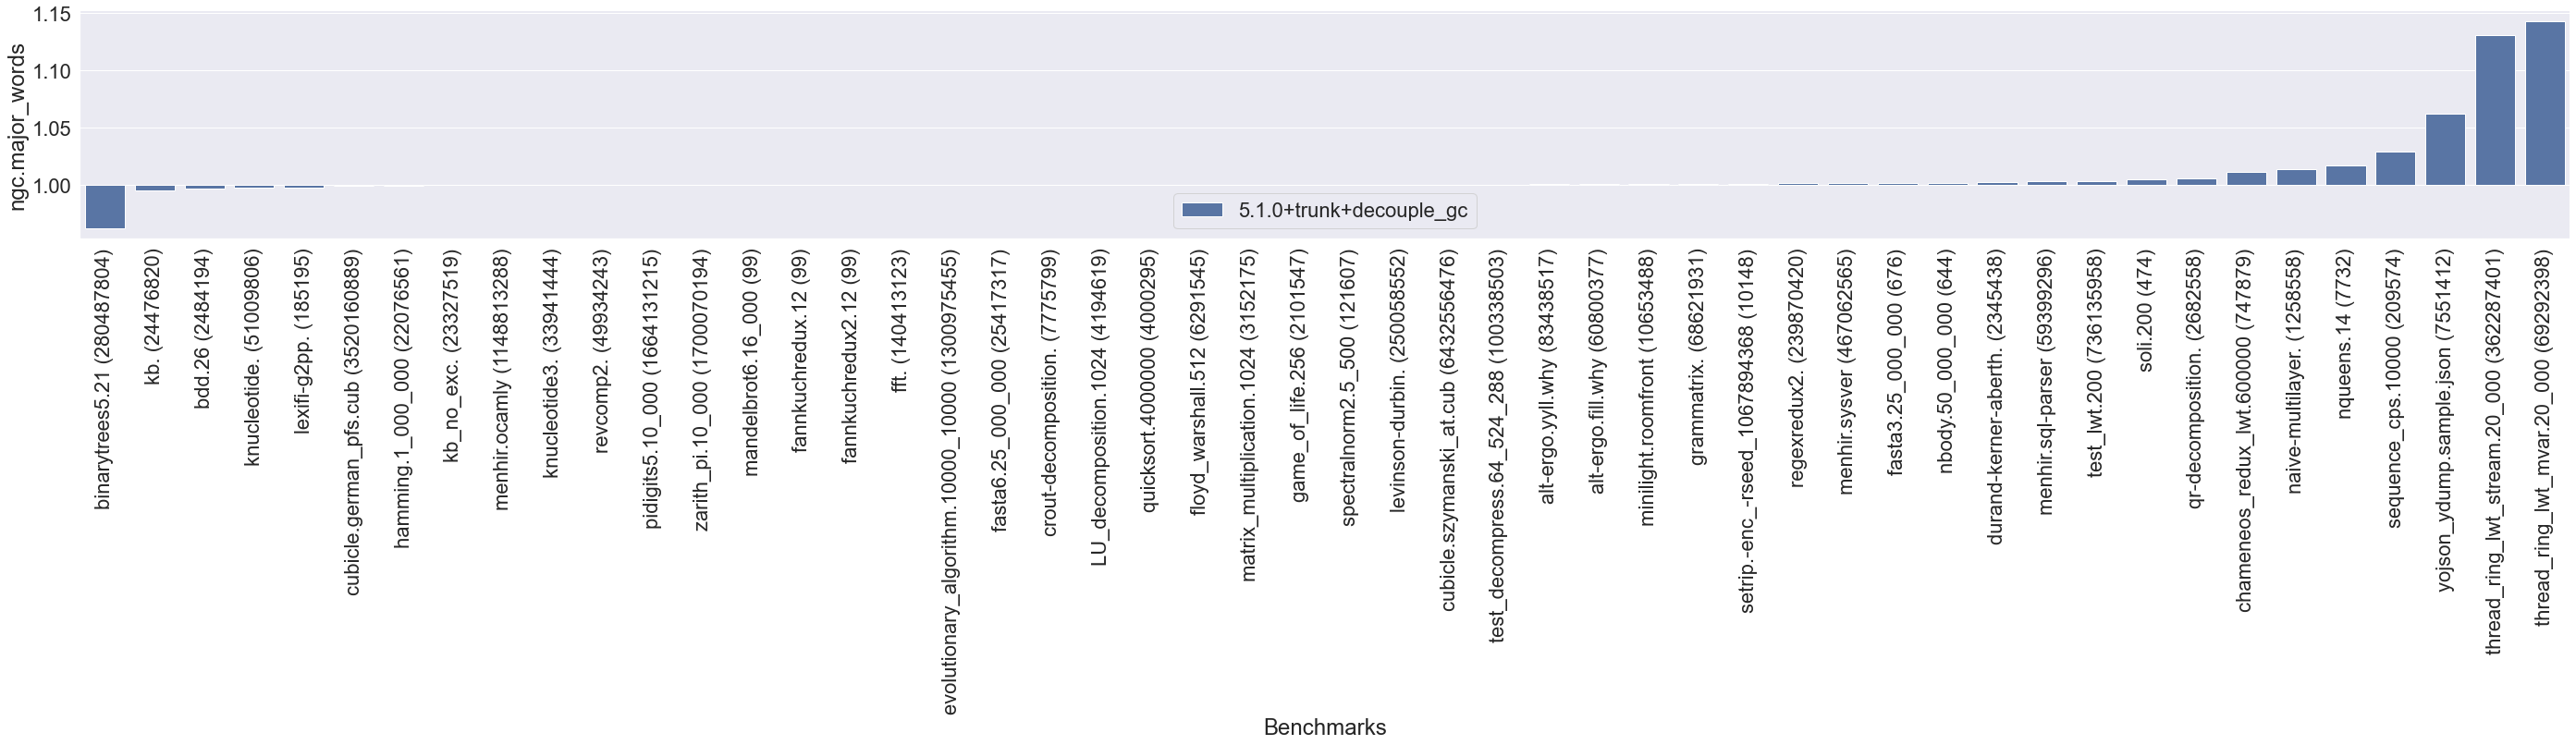

In [99]:
ndf = normalise(df,baseline,'gc.major_words')
plot_normalised(ndf,baseline,'ngc.major_words')

## Minor Collections

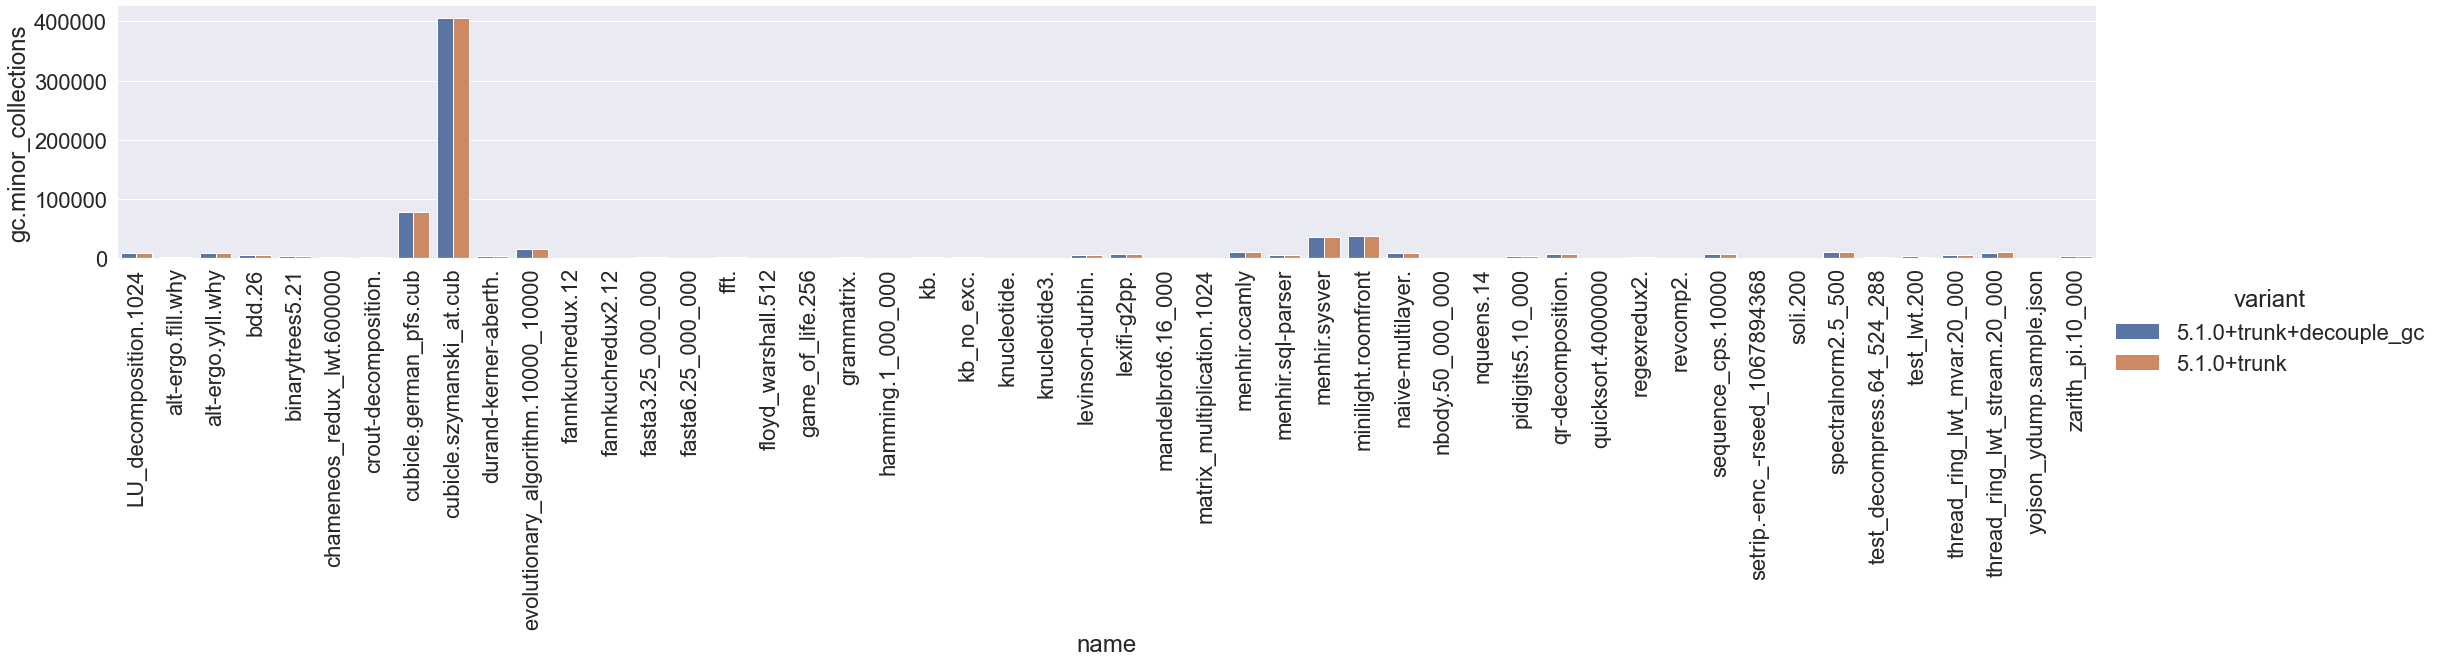

In [100]:
g = sns.catplot (x='name', y='gc.minor_collections', hue='variant', data = df, kind ='bar', aspect=6)
g.set_xticklabels(rotation=90)

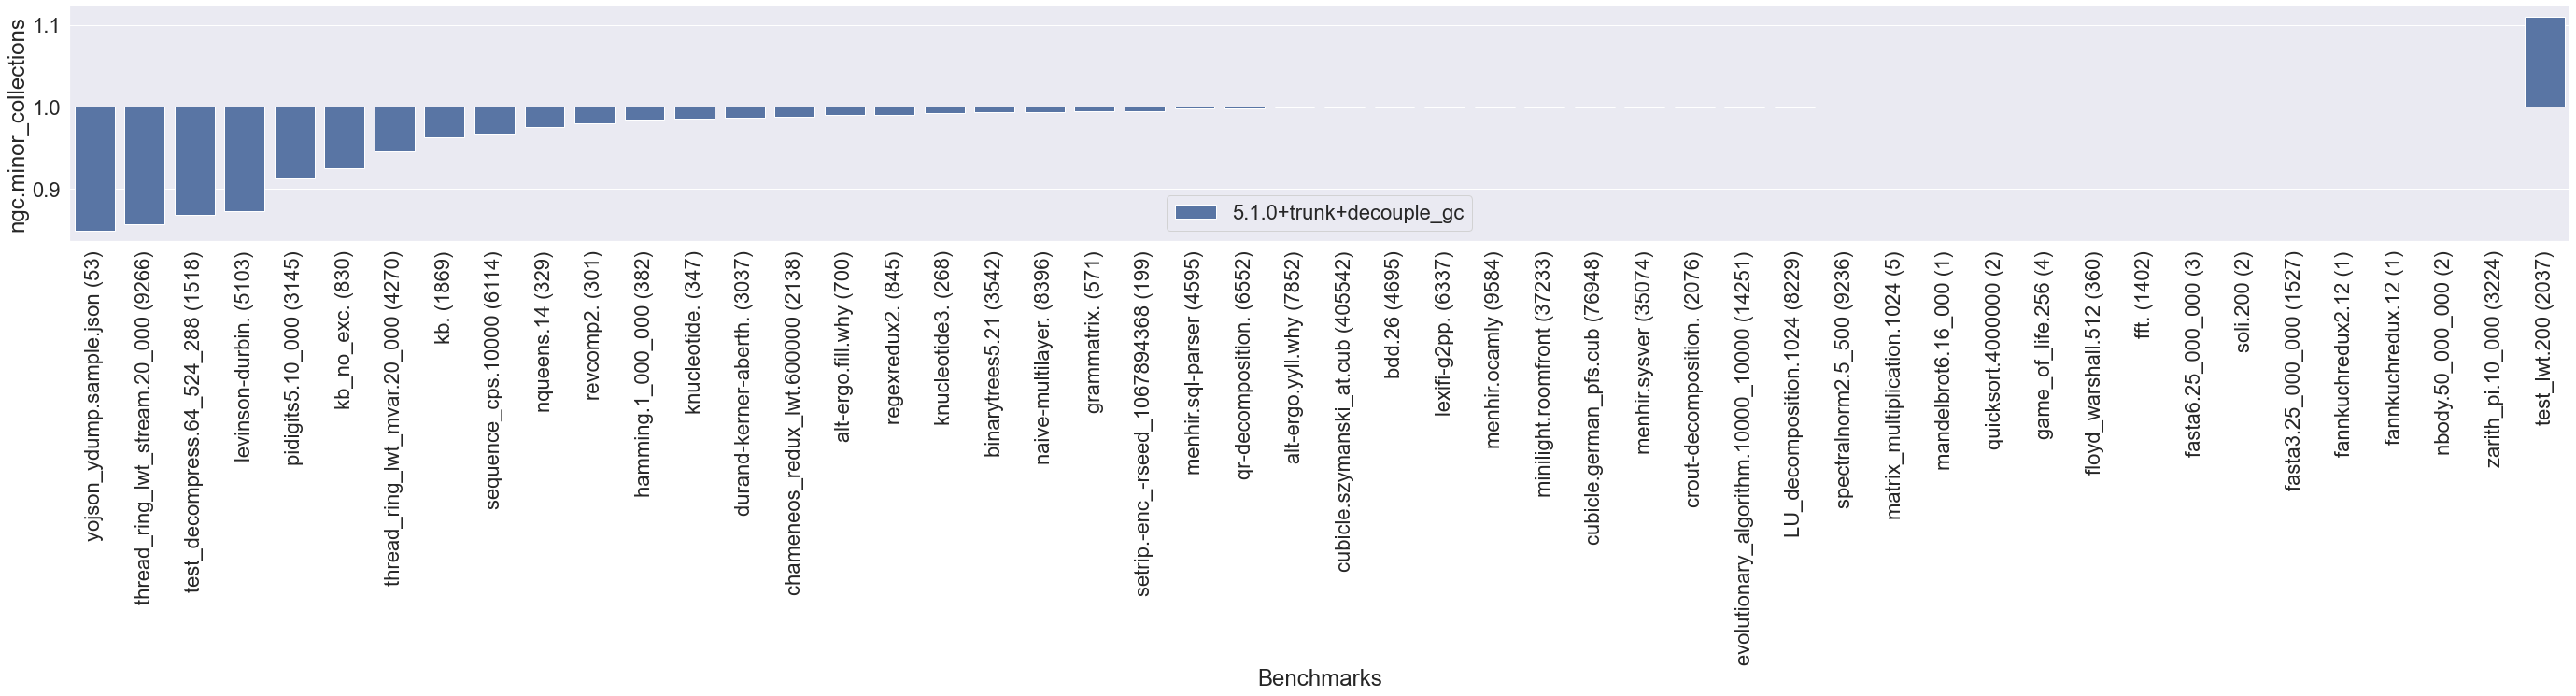

In [101]:
ndf = normalise(df,baseline,'gc.minor_collections')
plot_normalised(ndf,baseline,'ngc.minor_collections')